In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
import os

path = os.listdir('D:/CodeClause Work/Brain Tumor Detection/Training/')
classes = {'no_tumor':0,'pituitary_tumor':1}

In [5]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'D:/CodeClause Work/Brain Tumor Detection/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth + '/' + j, 0)
        img = cv2.resize(img,(200,200))
        X.append(img)
        Y.append(classes[cls])

In [6]:
np.unique(Y)

array([0, 1])

In [7]:
X = np.array(X)
Y = np.array(Y)

In [8]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [9]:
X.shape

(1222, 200, 200)

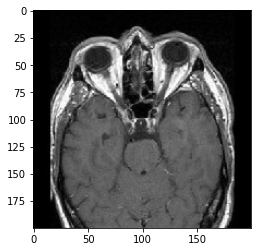

In [10]:
plt.imshow(X[0], cmap='gray')

In [11]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=20)

In [13]:
xtrain.shape, xtest.shape

((1202, 40000), (20, 40000))

In [14]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [15]:
from sklearn.decomposition import PCA 

In [16]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
pca_train = xtrain
pca_test = xtest

(1202, 40000) (20, 40000)


In [17]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

Training the Model

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [19]:
import warnings
warnings.filterwarnings('ignore')

lg= LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [29]:
sv = SVC()
sv.fit(pca_train,ytrain)

SVC()

In [30]:
print("Training Score:", lg.score(pca_train,ytrain))
print("Testing Score:", lg.score(pca_test, ytest))

Training Score: 1.0
Testing Score: 0.95


In [31]:
print("Training Score:", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest))

Training Score: 0.9933444259567388
Testing Score: 1.0


In [32]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([], dtype=int64),)

In [33]:
pred[6]

0

In [34]:
ytest[6]

0

TEST MODEL

In [35]:
dec = {0:"No tumor", 1:"Positive Tumor"}


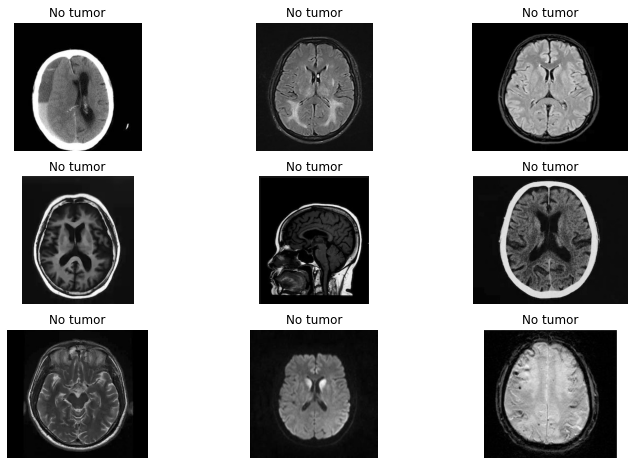

In [36]:
plt.figure(figsize=(12,8))
p = os.listdir('D:/CodeClause Work/Brain Tumor Detection/Testing/')
c=1
for i in os.listdir('D:/CodeClause Work/Brain Tumor Detection/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
     
    img = cv2.imread('D:/CodeClause Work/Brain Tumor Detection/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

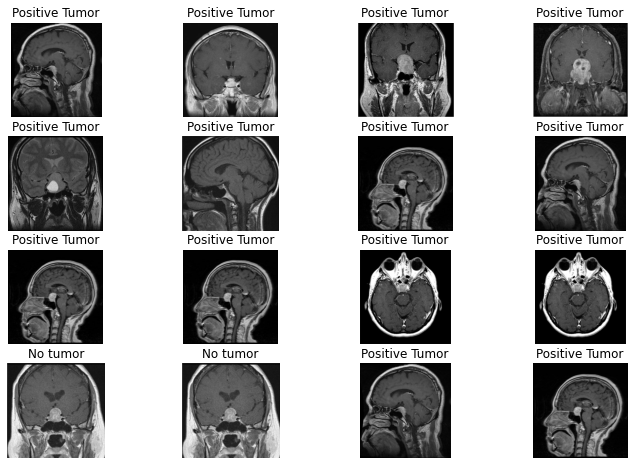

In [37]:
plt.figure(figsize=(12,8))
p = os.listdir('D:/CodeClause Work/Brain Tumor Detection/Testing/')
c=1
for i in os.listdir('D:/CodeClause Work/Brain Tumor Detection/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
     
    img = cv2.imread('D:/CodeClause Work/Brain Tumor Detection/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1